In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

    # Exclude the day (Feb. 12, 2020) of the change of the definition of confirmed cases in Hubei China.
    x_train = np.delete(x_train, np.s_[28 - (orders + 1) - start:28 - start], 0)
    y_train = np.delete(y_train, np.s_[28 - (orders + 1) - start:28 - start])

    return x_train, y_train

In [3]:
def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)
    return clf

In [4]:
df = pd.read_csv(r"F:\FYP\Final_Data(2022).csv")
df.head()

,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.


In [5]:
df_bal = df[df["Province"] == "Balochistan"]
df_bal.reset_index(inplace = True)
df_bal.head()

,index,Unnamed: 0,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,0,0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.0,Haze.
1,7,7,Balochistan,Pakistan,2020-03-11,11,3,2020,28.328492,65.898403,...,0.0,0.0,22.308130,43.81553,5.434522,31.71,7.00,45.71,0.0,Overcast.
2,14,14,Balochistan,Pakistan,2020-03-12,12,3,2020,28.328492,65.898403,...,0.0,0.0,16.956360,43.81952,0.082265,39.86,13.29,70.43,0.0,Overcast.
3,21,21,Balochistan,Pakistan,2020-03-13,13,3,2020,28.328492,65.898403,...,0.0,0.0,13.006370,43.71706,0.080828,43.14,14.71,48.43,0.0,Passing clouds.
4,28,28,Balochistan,Pakistan,2020-03-14,14,3,2020,28.328492,65.898403,...,0.0,0.0,9.366122,36.23496,0.201047,33.71,5.29,26.57,0.0,Haze.


In [6]:
for i in range(len(df_bal)):
    if df_bal["Recovered"][i] != 0:
        print(i)
        break
        
for i in range(len(df_bal)):
    if df_bal["Confirmed"][i] != 0:
        print(i)
        break
        
for i in range(len(df_bal)):
    if df_bal["Deaths"][i] != 0:
        print(i)
        break

0
0
12


In [7]:
########## data ##########
# data collected from https://voice.baidu.com/act/newpneumonia/newpneumonia
# X_cml = cumulative confirmed cases
X_cml = np.array(df_bal["Confirmed"])[12:-50]
# recovered = cumulative recovered cases
recovered = np.array(df_bal["Deaths"])[12:-50]
# death = cumulative deaths
death = np.array(df_bal["Recovered"])[12:-50]

population = 12340000

In [8]:
# ########## data ##########
# # data collected from https://voice.baidu.com/act/newpneumonia/newpneumonia
# # X_cml = cumulative confirmed cases
# X_cml = np.array([41, 45, 62, 121, 199, 291, 440, 574, 835, 1279, 1985, 2761, 4535, 5997, 7736, 9720, 11821, 14411, 17238, 20471, 24363, 28060, 31211, 34598, 37251, 40235, 42708, 44730, 59882, 63932, 66576, 68584, 70635, 72528, 74279, 75101, 75993, 76392, 77041, 77262, 77779, 78190, 78630, 78959, 79389, 79968, 80174, 80302, 80422, 80565, 80710, 80813, 80859, 80904, 80924, 80955, 80980, 81003, 81201, 81048, 81077, 81116, 81151, 81235, 81300, 81416, 81498, 81600, 81747, 81846, 81960, 82078, 82213, 82341, 82447, 82545, 82631, 82724, 82802, 82875, 82930, 83005, 83071, 83157, 83249], dtype=np.float64)[:-27]
# # recovered = cumulative recovered cases
# recovered = np.array([12, 12, 16, 21, 25, 25, 28, 28, 34, 38, 49, 51, 60, 103, 124, 171, 243, 328, 475, 632, 892, 1153, 1540, 2050, 2651, 3283, 3998, 4742, 5915, 6728, 8101, 9425, 10853, 12561, 14387, 16170, 18279, 20673, 22907, 24757, 27353, 29775, 32531, 36157, 39049, 41675, 44518, 47260, 49914, 52109, 53793, 55477, 57143, 58684, 59982, 61567, 62887, 64216, 65649, 67022, 67863, 68799, 69725, 70547, 71284, 71876, 72382, 72841, 73299, 73791, 74196, 74737, 75122, 75600, 75937, 76225, 76415, 76610, 76785, 76984, 77210, 77348, 77450, 77586, 77711], dtype=np.float64)[:-27]
# # death = cumulative deaths
# death = np.array([2, 3, 3, 3, 4, 6, 9, 18, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 491, 564, 637, 723, 812, 909, 1017, 1114, 1368, 1381, 1524, 1666, 1772, 1870, 2006, 2121, 2239, 2348, 2445, 2595, 2666, 2718, 2747, 2791, 2838, 2873, 2915, 2946, 2984, 3015, 3045, 3073, 3100, 3123, 3140, 3162, 3173, 3180, 3194, 3204, 3218, 3231, 3242, 3250, 3253, 3261, 3267, 3276, 3283, 3287, 3293, 3298, 3301, 3306, 3311, 3314, 3321, 3327, 3331, 3335, 3338, 3340, 3340, 3342, 3344], dtype=np.float64)[:-27]

# population = 1439323776

In [9]:
########## data preprocess ##########
X = X_cml - recovered - death
R = recovered + death

n = np.array([population] * len(X))

S = n - X - R

X_diff = np.array([X[:-1], X[1:]]).T
R_diff = np.array([R[:-1], R[1:]]).T

gamma = (R[1:] - R[:-1]) / X[:-1]
beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
R0 = beta / gamma

In [10]:
########## Parameters for Ridge Regression ##########
##### Orders of the two FIR filters in (12), (13) in the paper. #####
orders_beta = 3
orders_gamma = 3

##### Select a starting day for the data training in the ridge regression. #####
start_beta = 10
start_gamma = 10

########## Print Info ##########
print("\nThe latest transmission rate beta of SIR model:", beta[-1])
print("The latest recovering rate gamma of SIR model:", gamma[-1])
print("The latest basic reproduction number R0:", R0[-1])

########## Ridge Regression ##########
##### Split the data to the training set and testing set #####
x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)


The latest transmission rate beta of SIR model: 0.017086865759001393
The latest recovering rate gamma of SIR model: 0.016143497757847534
The latest basic reproduction number R0: 1.0584364067381418


In [11]:
##### Searching good parameters #####
# clf_beta = ridge(x_beta, y_beta)
# clf_gamma = ridge(x_gamma, y_gamma)

In [12]:
##### Training and Testing #####
clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)

beta_hat = clf_beta.predict(x_beta)
gamma_hat = clf_gamma.predict(x_gamma)


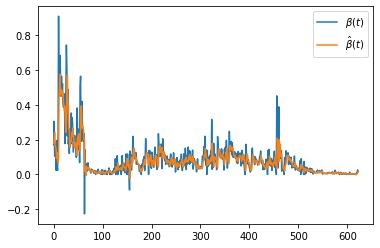

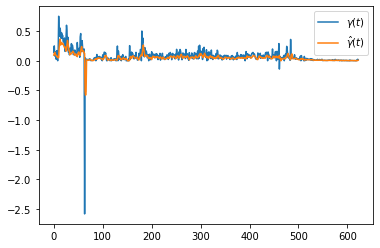

In [13]:
##### Plot the training and testing results #####
plt.figure(1)
plt.plot(y_beta, label=r'$\beta (t)$')
plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
plt.legend()

plt.figure(2)
plt.plot(y_gamma, label=r'$\gamma (t)$')
plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
plt.legend()

In [14]:
########## Time-dependent SIR model ##########

##### Parameters for the Time-dependent SIR model #####
stop_X = 0 # stopping criteria
stop_day = 100 # maximum iteration days (W in the paper)

day_count = 0
turning_point = 0

S_predict = [S[-1]]
X_predict = [X[-1]]
R_predict = [R[-1]]

predict_beta = np.array(beta[-orders_beta:]).tolist()
predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
    if predict_beta[-1] > predict_gamma[-1]:
        turning_point += 1

    next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
    next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]

    if next_beta < 0:
        next_beta = 0
    if next_gamma < 0:
        next_gamma = 0

    predict_beta.append(next_beta)
    predict_gamma.append(next_gamma)

    next_S = ((-predict_beta[-1] * S_predict[-1] *
               X_predict[-1]) / n[-1]) + S_predict[-1]
    next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
              n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1]
    next_R = (predict_gamma[-1] * X_predict[-1]) + R_predict[-1]

    S_predict.append(next_S)
    X_predict.append(next_X)
    R_predict.append(next_R)

    day_count += 1

In [15]:
########## Print Info ##########
print('\nConfirmed cases tomorrow in Balochistan:', np.rint(X_predict[1] + R_predict[1]))
print('Infected persons tomorrow in Balochistan:', np.rint(X_predict[1]))
print('Recovered + Death persons tomorrow in Balochistan:', np.rint(R_predict[1]))

print('\nEnd day:', day_count)
print('Confirmed cases on the end day in Balochistan:', np.rint(X_predict[-2] + R_predict[-2]))

print('\nTuring point in Balochistan:', turning_point)


Confirmed cases tomorrow in Balochistan: 33624.0
Infected persons tomorrow in Balochistan: 1121.0
Recovered + Death persons tomorrow in Balochistan: 32502.0

End day: 101
Confirmed cases on the end day in Balochistan: 34058.0

Turing point in Balochistan: 101


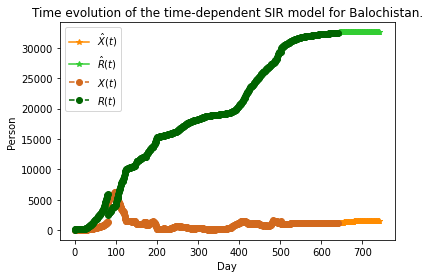

In [16]:
########## Plot the time evolution of the time-dependent SIR model ##########
plt.figure(3)
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
plt.plot(range(len(X)), X, 'o--', label=r'$X(t)$', color='chocolate')
plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
plt.xlabel('Day')
plt.ylabel('Person')
plt.title('Time evolution of the time-dependent SIR model for Balochistan.')

plt.legend()

plt.show()